In [ ]:
import sys #system
import numpy
import matplotlib
import pandas
import sklearn

In [ ]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn:{}'.format(sklearn.__version__))

Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Numpy: 1.23.5
matplotlib: 3.7.1
pandas: 1.5.3
sklearn:1.2.2


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # svm: support vector moddel, svc: support vector classifier
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names =['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
        'marginal_adhesion','single_epithelial_Size','bare_nuclei',
        'vland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url, names=names)
# type of cancer is
# A. maligant, B = benign
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_Size,bare_nuclei,vland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
#preprocess the data
df.replace('?',-99999, inplace =True)
print(df.axes)

df.drop(['id'],1,inplace=True)

#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_Size', 'bare_nuclei',
       'vland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


<ipython-input-11-0230c0beaa65>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'],1,inplace=True)


In [ ]:
# Do dataset Visualizations
print(df.loc[6]) # loc: is Location
print(df.describe())


clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_Size     2
bare_nuclei               10
vland_chromatin            3
normal_nucleoli            1
mitoses                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_Size  vland_chromatin  \
count         699.000000        

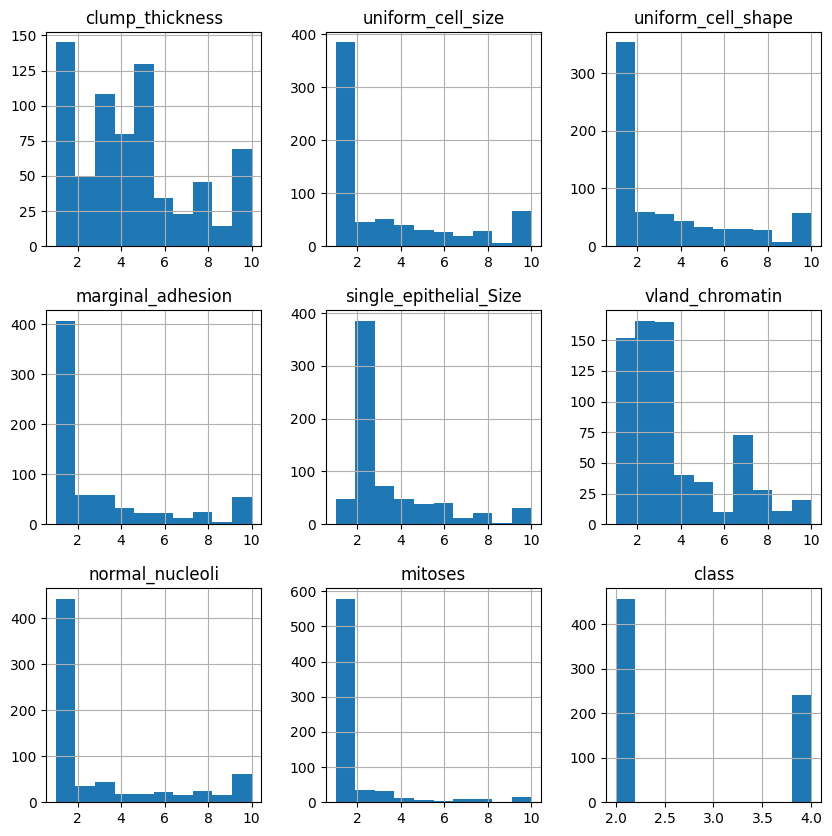

In [ ]:
# plot histograms for each variable
df.hist(figsize= (10,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

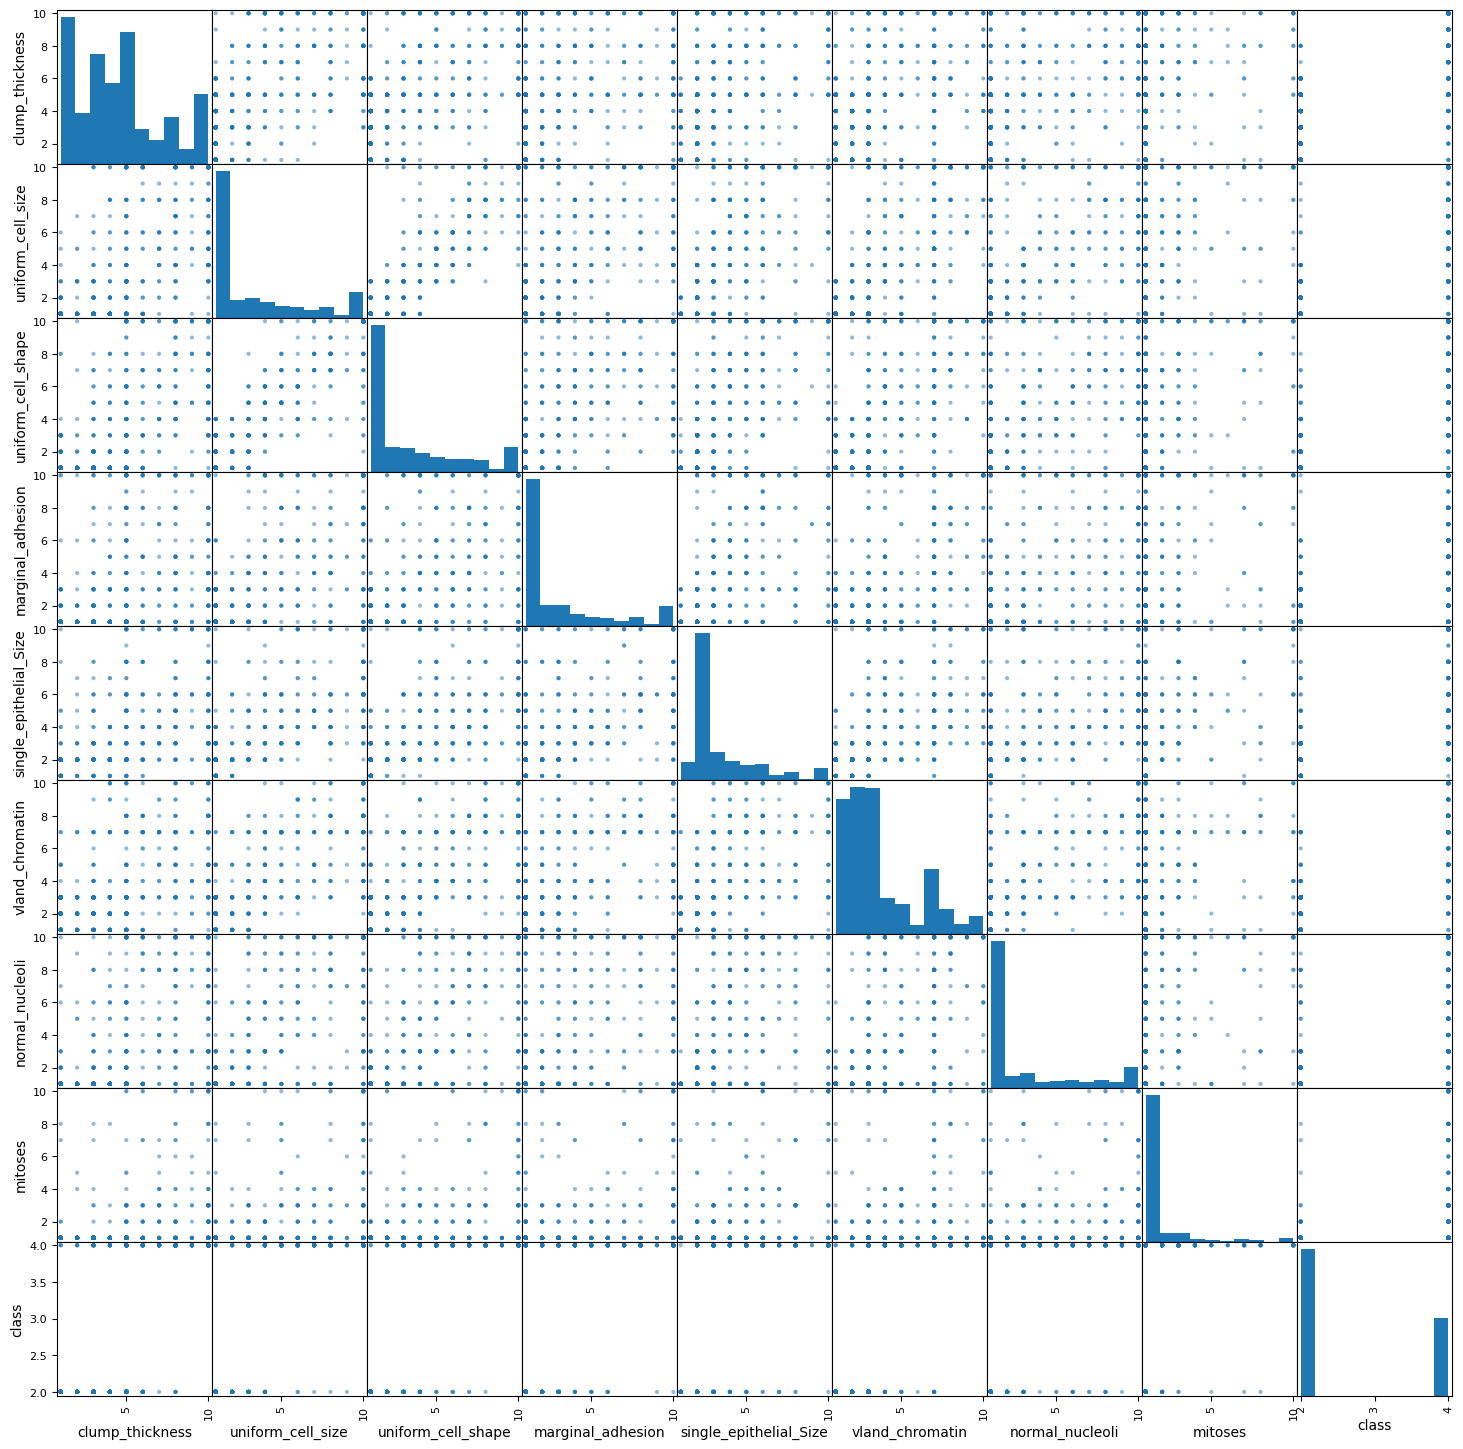

In [ ]:
# create scatter plot matrix
scatter_matrix(df,figsize = (18,18))
plt.show

In [ ]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



<ipython-input-15-75297426be68>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'],1))


In [ ]:
# specify testing options
seed =  8
scoring = 'accuracy'


In [ ]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, shuffle = True)
  cv_results = model_selection.cross_val_score(model,X_train, y_train, cv =kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
  print(msg)

KNN: 0.969610 (0.025301)
SVM: 0.654773 (0.071282)


In [ ]:
# Make predictions on validation dataset

for name,model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)

  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.6571428571428571
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        92
           4       0.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.43      0.66      0.52       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# clf = SVC()
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[5,4,4,5,7,10,3,2,1]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.9785714285714285
[4]
